In [30]:
import xarray as xr
ds = xr.open_zarr("./scalar-raster.zarr", consolidated=False)
ds


<xarray.Dataset> Size: 133kB
Dimensions:      (y: 128, x: 128)
Coordinates:
  * y            (y) float64 1kB -2e+06 -1.969e+06 ... 1.969e+06 2e+06
  * x            (x) float64 1kB -2e+06 -1.969e+06 ... 1.969e+06 2e+06
Data variables:
    scalar_data  (y, x) float64 131kB dask.array<chunksize=(128, 128), meta=np.ndarray>
    spatial_ref  int64 8B ...
Attributes:
    Conventions:  CF-1.8
    profile:      scalar-raster

In [51]:
from pyproj import Transformer, CRS

# Define lat, lon coordinates to select
lat, lon = 10.0, 20.0  # example latitude, longitude
wkt_crs = ds["spatial_ref"].attrs["crs_wkt"]
crs = CRS.from_wkt(wkt_crs)
epsg_code = crs.to_epsg()
print(epsg_code)
# Convert lat/lon to dataset CRS (Web Mercator EPSG:3857)
transformer = Transformer.from_crs("EPSG:4326", wkt_crs, always_xy=True)
x, y = transformer.transform(lon, lat)
print(x)
# Select nearest data point
selected_point = ds.sel(x=x, y=y, method="nearest")
selected_point.scalar_data.values


3857
2226389.8158654715


array(0.10084893)

<xarray.Dataset> Size: 133kB
Dimensions:      (y: 128, x: 128)
Coordinates:
  * y            (y) float64 1kB -2e+06 -1.969e+06 ... 1.969e+06 2e+06
    spatial_ref  int64 8B 0
  * x            (x) float64 1kB -2e+06 -1.969e+06 ... 1.969e+06 2e+06
Data variables:
    scalar_data  (y, x) float64 131kB dask.array<chunksize=(128, 128), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.8
    profile:      scalar-raster

In [22]:
import rioxarray
from pyproj import Transformer, CRS

# Extract WKT from the dataset attribute
wkt_crs = ds["spatial_ref"].attrs["crs_wkt"]

# Assign CRS using WKT directly
ds = ds.rio.write_crs(wkt_crs)

# Define latitude, longitude
lat, lon = 45.0, 3.0

# Transform from lat/lon to dataset CRS
transformer = Transformer.from_crs("EPSG:4326", CRS.from_wkt(wkt_crs), always_xy=True)
x, y = transformer.transform(lon, lat)

# Select nearest data point
selected_point = ds.sel(x=x, y=y, method="nearest")

print(selected_point)


<xarray.Dataset> Size: 32B
Dimensions:      ()
Coordinates:
    y            float64 8B 2e+06
    x            float64 8B 3.307e+05
    spatial_ref  int64 8B 0
Data variables:
    scalar_data  float64 8B dask.array<chunksize=(), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.8
    profile:      scalar-raster


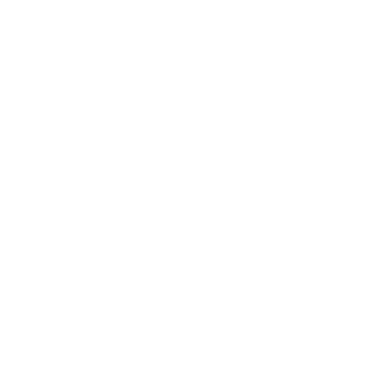

In [7]:
import matplotlib.pyplot as plt
plt.imshow(rgb.rgb_data.isel(band=0))
plt.axis('off')  # Optional: remove axis ticks and labels
plt.show()


In [ ]:
wkt_crs = ds["spatial_ref"].attrs["crs_wkt"]

# Assign CRS using WKT directly
ds = ds.rio.write_crs(wkt_crs)

# Define latitude, longitude
lat, lon = 45.0, 3.0

# Transform from lat/lon to dataset CRS
transformer = Transformer.from_crs("EPSG:4326", CRS.from_wkt(wkt_crs), always_xy=True)
x, y = transformer.transform(lon, lat)

# Select nearest data point
selected_point = ds.sel(x=x, y=y, method="nearest")

In [ ]:
import numpy as np
import xarray as xr

# Assume existing rgb_data has dimensions ('band', 'y', 'x')
rgb_data = xr.DataArray(
    np.random.rand(3, 10, 10),  # original RGB data placeholder
    dims=('band', 'y', 'x'),
    coords={'band': ['R', 'G', 'B']}
)

# Fill the first band (band=0) with dummy values, e.g. ones
rgb_data.loc[dict(band='R')] = np.ones((10, 10))

# Display resulting band
print(rgb_data.isel(band=0))


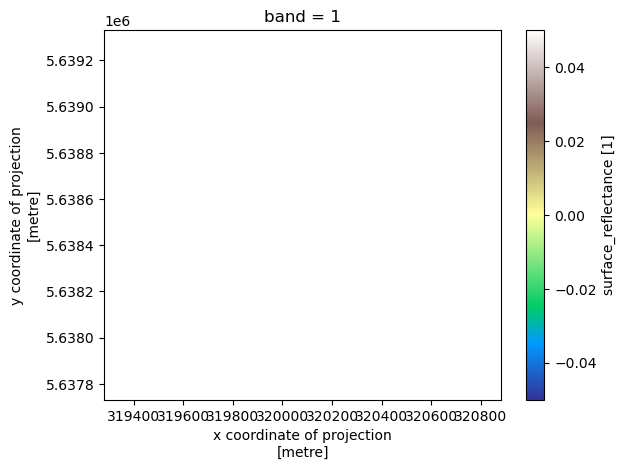

In [11]:
rgb.rgb_data.isel(band=0).plot.pcolormesh(cmap='terrain')

In [13]:
rgb.rgb_data.isel(band=0).values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(128, 128))

In [15]:
import xarray as xr
scalar = xr.open_zarr("./scalar-raster.zarr", consolidated=False)
scalar

<bound method Mapping.values of <xarray.Dataset> Size: 133kB
Dimensions:      (y: 128, x: 128)
Coordinates:
  * y            (y) float64 1kB 0.0 1.0 2.0 3.0 4.0 ... 124.0 125.0 126.0 127.0
  * x            (x) float64 1kB 0.0 1.0 2.0 3.0 4.0 ... 124.0 125.0 126.0 127.0
Data variables:
    scalar_data  (y, x) float64 131kB dask.array<chunksize=(128, 128), meta=np.ndarray>
    spatial_ref  int64 8B ...
Attributes:
    Conventions:  CF-1.8
    profile:      scalar-raster>